In [1]:
# Warmup 1: what module allows us to work with random numbers?  Import it.
import random

In [2]:
import pandas as pd
from pandas import DataFrame, Series

import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams["font.size"] = 15

### Lecture 39:  Plotting Applications

**Learning Objectives**

39.1 Use data from a dataframe to generate random simulations

39.2 Apply features of line plots and bar plots to visualize results of data investigations

39.3 Clean Series data by dropping NaN values and by converting to int

39.4 Make a stacked bar plot

### Using Stock Market Data to Generate Random Simulations

In [3]:
df = pd.read_csv("sp500.csv") 
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


### Add a column to your dataframe

In [4]:
# add an extra column called "total" to the dataframe
# the value for the "total column will be :  df["return"].cumprod()
df['total'] = df["return"].cumprod()
df.tail()

,year,return,total
47,2017,1.2183,122.296742
48,2018,0.9557,116.878996
49,2019,1.3149,153.684192
50,2020,1.1840,181.962083
51,2021,1.1059,201.231868


### Add another column to your dataframe called "wealth"

In [5]:
starting = 1000
 
df["wealth"] = df["total"] * starting

df.tail()

,year,return,total,wealth
47,2017,1.2183,122.296742,122296.741896
48,2018,0.9557,116.878996,116878.996230
49,2019,1.3149,153.684192,153684.192143
50,2020,1.1840,181.962083,181962.083497
51,2021,1.1059,201.231868,201231.868140


### Make a line plot for the wealth column, with index of year

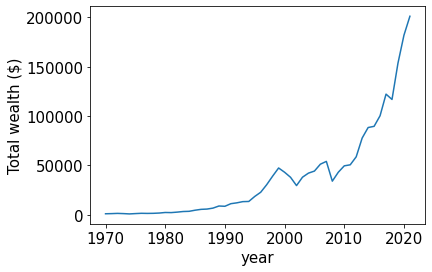

In [6]:
# make a line plot for just the wealth column
# store the result in the variable ax

# make a series with index of year and y-values the 'wealth' column
wealth_series = df.set_index('year')['wealth'] 
wealth_series


# plot this series
ax = wealth_series.plot.line()
ax.set_ylabel("Total wealth ($)")
None

### Use Random.choices to randomly select a number of values from a list

In [7]:
import random
random.choice([3, 5, 9]) # selects one

9

In [8]:
# make a list of 10 random choices from this list, with replacement
random.choices([3, 5, 9], k = 10) 

[9, 5, 3, 5, 5, 3, 3, 5, 3, 3]

### Simulating stock market returns using past results
### Approach:
1. First, Run one simulation by randomly choosing previous returns, store the result in a Series
2. Then, Run many simulations, storing all the Series in a dataframe

In [9]:
# Step 1  Run one simulation by randomly choosing previous returns
def run_sim(years = 10, starting = 1000):
    # choose random choices from the 'return' column of our dataframe
    rand_returns = random.choices(df["return"], k = years) 
    #print(rand_returns)
    # simulate from these values
    cum_returns = Series(rand_returns).cumprod() * starting
    return cum_returns

run_sim(7)

# what does this Series represent?

0    1264.600000
1    1665.351740
2    1981.435500
3    2505.723334
4    3269.217233
5    4265.347724
6    4321.650314
dtype: float64

In [10]:


# Step 2 run many simulations and collect all the results into a dataframe
def run_n_sims(num_sims, years = 10, starting = 1000):
    s = pd.DataFrame()
    for i in range(num_sims):
        # this builds a dataframe one column (Series) at a time
        s["sim" + str(i)] = run_sim(years, starting) 
    return s

# small simulation to understand how it works
run_n_sims(3, 5)

,sim0,sim1,sim2
0,1013.200000,1013.200000,1013.200000
1,1134.378720,1332.256680,1302.772560
2,1205.504266,1037.827954,1402.043829
3,1550.037385,1264.385796,1668.151748
4,1668.150234,1540.401215,1836.301444


In [11]:
# run 10 simulations, each lasting 30 years 
sims = run_n_sims(num_sims=100, years=30)
sims.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim90,sim91,sim92,sim93,sim94,sim95,sim96,sim97,sim98,sim99
25,17482.502342,18061.944935,14910.863098,11505.194156,14558.938939,31425.688787,21864.359168,8915.381521,18787.823367,8522.486873,...,10896.266068,14964.372648,18830.064989,7870.345686,12704.576275,7089.843809,55101.176397,16543.227180,56406.099443,31019.002284
26,19384.598597,19882.588985,19636.115614,10679.121216,19274.579262,36645.495695,24179.794804,8639.004694,24176.171109,10966.736108,...,14531.260428,14228.125514,20010.710064,10367.606373,13371.566529,7239.439513,56263.811219,15355.423469,63152.268936,32542.035297
27,21437.427588,25940.813848,20423.523850,12926.008320,24783.254015,42732.312529,22990.148900,5442.572957,32033.426719,14530.925344,...,15996.011479,8963.719074,22403.990987,6531.592015,16184.944127,7714.346745,66616.352483,18186.963556,64023.770248,34139.849230
28,28588.953432,28555.647884,23815.871162,13604.623757,25777.062501,56274.182370,21859.033574,6882.677762,32456.267952,16069.750337,...,20869.996176,11954.015757,24111.175100,6793.508855,21584.241488,7820.804731,87753.721126,19141.779143,70989.556451,41496.986739
29,27702.695875,36745.407697,27402.541359,15752.793848,30520.042001,73420.925738,28742.443247,8856.629743,37344.181905,22108.762514,...,19843.192365,12540.957931,24429.442612,6175.299549,25037.720126,8311.169187,85033.355771,22024.531082,89773.393088,43161.015907


<AxesSubplot:>

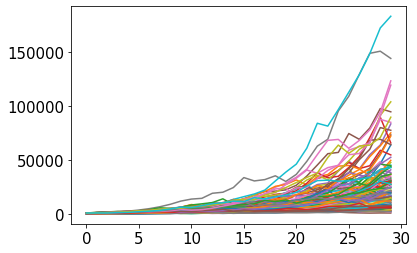

In [12]:
# line plot on a dataframe
# what happens when you set legend to True?
sims.plot.line(legend = False)

### Use the Quantile function to get a particular percentile
- defaults to 50th percentile
- defaults to calculating on all rows down each column and returning a Series

In [13]:
sims.quantile()


sim0      3607.455141
sim1      9962.091589
sim2      8091.896168
sim3      4866.729148
sim4      7706.469215
             ...     
sim95     3115.656660
sim96    10732.279284
sim97     8824.020569
sim98    13228.718878
sim99    11982.530622
Name: 0.5, Length: 100, dtype: float64

In [14]:
# axis is the keyword argument that tells quantile how to make one calculation
# the default is axis='index'....this df matches the one above
sims.quantile(axis='index')

sim0      3607.455141
sim1      9962.091589
sim2      8091.896168
sim3      4866.729148
sim4      7706.469215
             ...     
sim95     3115.656660
sim96    10732.279284
sim97     8824.020569
sim98    13228.718878
sim99    11982.530622
Name: 0.5, Length: 100, dtype: float64

### How can you change *quantile* to compute percentile across the columns?
- to change to iterating over each column of a single row, use axis = 'columns'
- axis works for many functions like mean, std, etc.,

In [15]:
sims.max(axis='columns')


0       1375.800000
1       1809.039420
2       2287.711251
3       2769.045698
4       3057.521487
5       4047.852697
6       5332.236358
7       7059.347714
8       9353.635721
9      12299.095610
10     14151.339408
11     14846.170173
12     19521.229161
13     20479.721513
14     24788.654919
15     34010.034549
16     30915.121405
17     32154.817773
18     35653.261947
19     39050.232423
20     46461.966537
21     61185.763733
22     84179.373743
23     81569.813157
24     96798.897274
25    112877.194111
26    129294.529961
27    148766.286173
28    172215.718889
29    183013.644464
dtype: float64

In [16]:
sims.quantile(0.5, axis = 'columns')

0      1119.600000
1      1294.321620
2      1409.676086
3      1509.636350
4      1643.837488
5      1835.173877
6      2171.968550
7      2441.418724
8      2809.621859
9      2936.661152
10     3166.708334
11     3558.458999
12     3869.086533
13     4242.230091
14     5030.492195
15     5320.003043
16     5793.921204
17     6316.129511
18     7049.950517
19     8063.353018
20     8411.691976
21     9924.679831
22    10864.289092
23    12081.884785
24    14250.229778
25    14985.342831
26    18393.026689
27    20451.253935
28    21668.988847
29    24733.581369
Name: 0.5, dtype: float64

In [17]:
sims

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim90,sim91,sim92,sim93,sim94,sim95,sim96,sim97,sim98,sim99
0,1184.400000,1049.100000,1119.600000,909.000000,1238.400000,1160.000000,1052.500000,1215.500000,1076.200000,1013.200000,...,1333.600000,1108.800000,969.000000,735.300000,1160.000000,1218.300000,1119.600000,1065.600000,1166.100000,1304.700000
1,1010.766960,1439.365200,1296.384840,928.179900,1436.544000,1352.676000,819.897500,1446.201900,1091.051560,1199.628800,...,1614.189440,698.544000,1292.258400,823.241880,1409.980000,1540.662180,1386.512640,1262.096640,1545.082500,1357.018470
2,1390.613184,1121.265491,1716.283890,1082.350581,1365.866035,1441.411546,943.374064,1677.594204,1326.173171,1423.599497,...,1999.012202,732.842510,1662.878109,974.718386,1728.071488,1787.168129,1642.185571,1672.278048,1792.295700,1314.950897
3,1814.333021,1476.594525,2208.514109,1105.188179,1625.107409,1396.727788,1240.442556,2209.223807,1033.088900,1874.738178,...,2026.598571,810.450532,1684.828100,1013.804593,2276.388571,1525.169281,1767.320111,2202.222961,1982.099815,1662.886905
4,2006.470887,1798.935110,2297.075525,1455.864388,1646.558826,1269.625559,1365.479166,1720.985346,1046.725674,1181.085052,...,1881.088794,1073.846955,1964.678048,1166.483565,2324.420370,2008.495426,2092.507012,2435.438373,2610.227246,1838.986628
5,2339.745702,1989.442338,2625.787033,1664.198582,2195.850851,1470.099435,1652.775982,2006.841012,1242.149357,1620.448691,...,2286.463428,1381.826262,2415.768127,1555.622482,3056.380345,2227.019729,2751.437470,2680.930561,3358.840420,2530.077803
6,3076.531623,2114.180372,2313.580954,2205.063121,2907.086942,1820.571140,1961.349258,2659.064341,1633.302190,1722.050824,...,2652.297577,1437.237495,3108.610426,2074.578142,3474.798814,2545.706252,2424.291555,3064.571724,3839.490484,2995.612119
7,3310.963333,2575.705948,2974.802391,2251.589953,3200.121305,2069.807329,2287.129370,2927.098026,1904.593683,2132.587741,...,1950.234408,1366.525410,4000.159896,2387.009610,3520.666158,3094.305949,2771.207676,3225.461740,4754.825016,3709.766048
8,3473.531633,3064.574936,3523.355952,2666.783140,3922.068672,2617.478348,3146.632587,3624.918196,2408.549172,2925.910380,...,2569.043786,1880.065660,4262.570386,2103.194168,3347.449383,3137.007371,3376.162312,4273.736805,5631.614748,5089.799018
9,3664.228519,3768.201342,3878.510232,2985.730403,3565.160423,3036.274884,3620.515455,2823.811274,2961.552062,2964.532397,...,2737.573059,2507.255564,4846.116272,1794.865903,2108.893111,2911.770242,4469.701285,5575.944410,5705.952063,6702.756326


In [18]:
df = DataFrame({   # TODO: CHANGE THE QUANTILE VALUES
    "10th percentile": sims.quantile(0.10, axis = 'columns'),
    "median": sims.quantile(0.50, axis = 'columns'),
    "90th percentile": sims.quantile(0.90, axis = 'columns')
})
df

,10th percentile,median,90th percentile
0,909.000000,1119.600000,1318.070000
1,909.214272,1294.321620,1547.454250
2,947.959615,1409.676086,1847.018983
3,887.675560,1509.636350,2206.119530
4,963.506171,1643.837488,2462.532755
5,1109.757514,1835.173877,3060.240320
6,1168.861907,2171.968550,3477.663064
7,1238.507960,2441.418724,3999.418670
8,1348.563068,2809.621859,4703.164403
9,1552.646290,2936.661152,5535.763257


<AxesSubplot:>

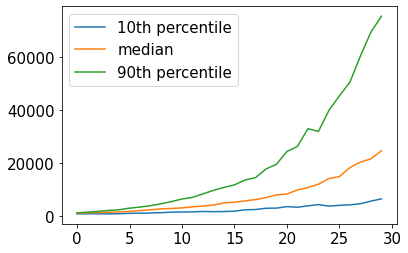

In [19]:

df.plot.line()

# Bar Plot Example w/ Fire Hydrants

In [20]:
hdf = pd.read_csv("Fire_Hydrants.csv")
hdf.tail()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
10104,-89.439367,43.040481,286329,WUJAG,2018-08-13T18:03:33.000Z,WUJAG,2018-08-13T18:04:02.000Z,HYDR-3964-4053,TC,1-1830-19,...,NaN,WATEROUS,NaN,2018.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10105,-89.426303,43.067854,286330,WUJAG,2018-08-13T18:14:14.000Z,WUJAG,2018-08-13T18:17:45.000Z,HYDR-4253-4054,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10106,-89.445461,43.053305,286729,WUJAG,2018-08-15T16:37:18.000Z,WUJAG,2018-08-15T16:39:24.000Z,HYDR-3859-4055,TC,1-1830-19,...,NaN,WATEROUS,NaN,2000.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10107,-89.388849,43.068576,286730,WUJAG,2018-08-15T16:51:54.000Z,WUJAG,2018-08-15T16:59:15.000Z,HYDR-5052-4056,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10108,-89.518896,43.062062,287129,WUJAG,2018-08-20T18:54:01.000Z,WUJAG,2018-08-20T19:27:16.000Z,-2355-4057,FASB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRIVATE,NaN


In [21]:
# grab just the column names
hdf.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### Let's create a *bar plot* to visualize *colors* of fire hydrants.

In [22]:
# make a series called color_counts which stores the value_counts() of the "nozzle_color"
color_counts = hdf["nozzle_color"].value_counts()
color_counts # what type is this? 

blue      5810
Blue      1148
Green      320
Orange      74
BLUE        45
green        9
Red          9
orange       4
GREEN        1
white        1
C            1
ORANGE       1
Name: nozzle_color, dtype: int64

In [23]:
# TODO:  clean the data ......use str.upper() which is how you change a Series to upper

color_counts= hdf["nozzle_color"].str.upper().value_counts()
color_counts

BLUE      7003
GREEN      330
ORANGE      79
RED          9
WHITE        1
C            1
Name: nozzle_color, dtype: int64

Text(0, 0.5, 'color')

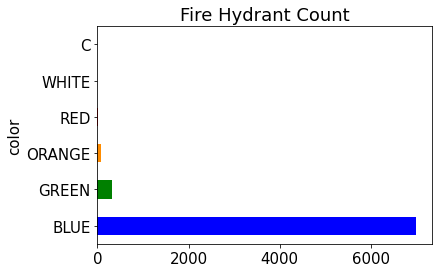

In [24]:
# make a horizontal bar plot of counts of colors and have the colors match
# use color list: ["b", "g", "darkorange", "r", "c", "0.5"]
ax = color_counts.plot.barh(color=["b", "g", "darkorange", "r", "0.5", "c"])
ax.set_title("Fire Hydrant Count")
ax.set_ylabel("color")

### Let's create a *bar plot* to visualize *style* of fire hydrants.

PACER                      3620
M-3                        1251
MUELLER                    1243
WB-59                       664
K-11                        351
K-81                        162
W-59                        151
CLOW 2500                   123
CLOW MEDALLION               70
CLOW                         50
CENTURIAN                    35
EDDY                         27
MUELLER 90                   13
MUELLER 86                   13
MUELLER SUPER CENTURIAN      12
MUELLER 92                   12
MUELLER 93                   11
MUELLER 91                    9
MUELLER 89                    9
MUELLER CENTURIAN             9
MUELLER 85                    8
MUELLER 87                    7
MUELLER 84                    6
M-2                           6
SUPER CENTURIAN               6
M-1                           5
MUELLER 83                    4
MEDALLION                     4
PACER 1996                    3
SUPER CENTURION               3
K-10                          3
PACER 90

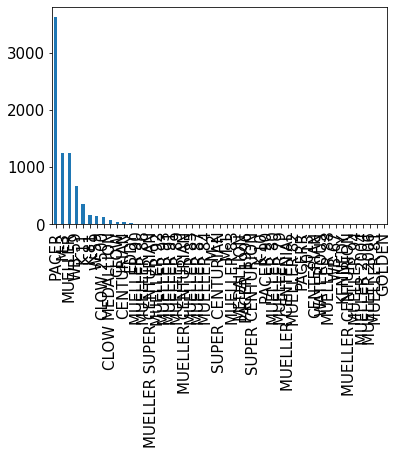

In [25]:
# Do the same thing as we did for the colors but this time for the "Style"
style_counts = hdf['Style'].str.upper().value_counts()
style_counts.plot.bar()
style_counts

In [39]:
# let's just grab the top 12 
top12 = style_counts[:12]
top12

PACER             3620
M-3               1251
MUELLER           1243
WB-59              664
K-11               351
K-81               162
W-59               151
CLOW 2500          123
CLOW MEDALLION      70
CLOW                50
CENTURIAN           35
EDDY                27
Name: Style, dtype: int64

In [40]:
# now add an index,value pair to our Series for the SUM of all the "other" values
top12["Other"] = style_counts[12:].sum()
top12

PACER             3620
M-3               1251
MUELLER           1243
WB-59              664
K-11               351
K-81               162
W-59               151
CLOW 2500          123
CLOW MEDALLION      70
CLOW                50
CENTURIAN           35
EDDY                27
Other              167
Name: Style, dtype: int64

Text(0.5, 1.0, 'Styles of Hydrants')

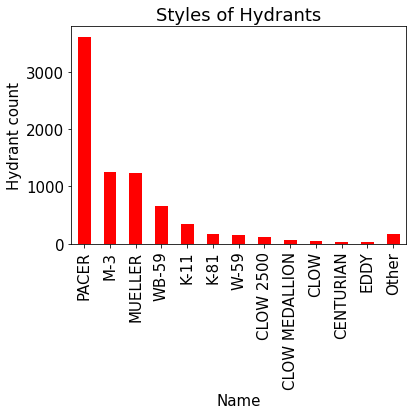

In [28]:

ax = top12.plot.bar(color="r")
ax.set_ylabel("Hydrant count")
ax.set_xlabel("Name")
ax.set_title("Styles of Hydrants")

## Note:  We got about this far in lecture....we will start in the next lecture with the cells below. 

### Finally:  Let's find out how many Pacers were installed per decade compared to other Styles

In [29]:
# let's look at the "year_manufactured" for just the Pacer "Style" and put that in a series

pacer_years = hdf [hdf["Style"] == "Pacer"]["year_manufactured"]


pacer_years


0        1996.0
1        1995.0
2        1996.0
3        1995.0
4        1996.0
          ...  
10050    2017.0
10051    2017.0
10052    2017.0
10053    2017.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

In [30]:
# then do the same for all the other kinds of hydrants hint: does not equal Pacer
other_years = hdf [hdf["Style"] != "Pacer"]["year_manufactured"]
other_years

18       1987.0
22       1996.0
23       1996.0
71       1987.0
72       1987.0
          ...  
10104    2018.0
10105    2017.0
10106    2000.0
10107    2017.0
10108       NaN
Name: year_manufactured, Length: 6651, dtype: float64

In [31]:
# let's do some arithmetic on this series to round each year down to the previous 10
# 1987 --> 1980,   2003 --> 2000
pacer_decades = (pacer_years // 10 * 10)
pacer_decades

0        1990.0
1        1990.0
2        1990.0
3        1990.0
4        1990.0
          ...  
10050    2010.0
10051    2010.0
10052    2010.0
10053    2010.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

In [44]:
# now let's drop the NaN values, convert to int, and do value counts
pacer_decade_counts = (pacer_years // 10 * 10).dropna().astype(int).value_counts()
pacer_decade_counts

2000    1730
1990     846
2010     503
1980      21
1960       1
Name: year_manufactured, dtype: int64

In [33]:
# TODO:  do the same for other_years
other_decade_counts = (other_years // 10 * 10).dropna().astype(int).value_counts()
other_decade_counts

2010    1196
1980     937
1970     578
1990     431
1950     371
1960     349
2000     215
1940      68
1930       9
1900       1
Name: year_manufactured, dtype: int64

In [34]:
# Build a DataFrame from a dictionary of key, Series
plot_df = DataFrame({
    "pacer": pacer_decade_counts,
    "other": other_decade_counts,
})
# notice how pandas added NaN values when a decade only applied to one column
plot_df

,pacer,other
1900,NaN,1
1930,NaN,9
1940,NaN,68
1950,NaN,371
1960,1.0,349
1970,NaN,578
1980,21.0,937
1990,846.0,431
2000,1730.0,215
2010,503.0,1196


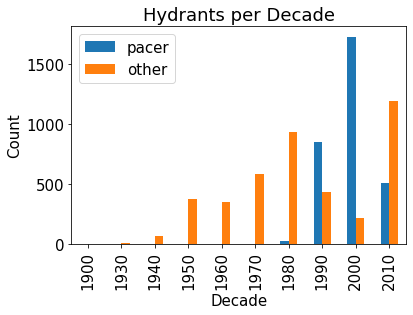

In [35]:
# make a bar plot of the Data Frame
# similar to line plots, Pandas automatically makes one bars for each column

ax = plot_df.plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Count")
ax.set_title("Hydrants per Decade")
None

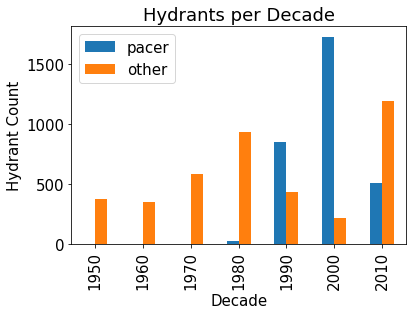

In [36]:
# change the x axis by filtering out decades before 1950
ax = plot_df[plot_df.index >= 1950].plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")
ax.set_title("Hydrants per Decade")
None

## Stacked Bar Charts

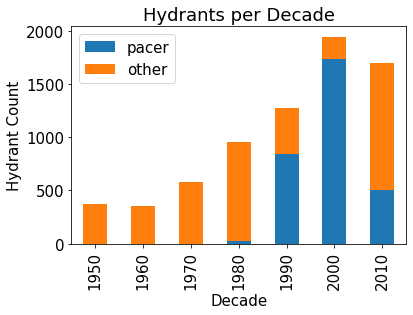

In [37]:
# make a Stacked Bar Chart!  
ax = plot_df[plot_df.index >= 1950].plot.bar(stacked=True)
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")
ax.set_title("Hydrants per Decade")
None

In [38]:
### BE sure you know how to make a stacked bar chart .... quiz/exam question